# 6.5 Machine Learning Part 2
# This script contains the following:
## 1. Importing libraries and data and renaming columns
## 2. The elbow technique
## 3. k-means clustering

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\User\250104_Global Internet Access Analysis'

In [6]:
df_internet = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'final_dataset.csv'))

In [7]:
df_internet.shape

(2175, 25)

In [8]:
df_internet.head()

,Unnamed: 0,Country Name,Country Code,Region,IncomeGroup,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [9]:
df_internet.drop(columns= ['Unnamed: 0'], inplace = True)
df_internet.rename(columns = {'Country Name' : 'Country_Name', 'Country Code': 'Country_Code', 'IncomeGroup' : 'Income_Group'}, inplace= True)

In [10]:
df_internet.head()

,Country_Name,Country_Code,Region,Income_Group,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,Electricity_Access_Urban,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,95.0,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,92.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,98.7,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,92.5,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,99.5,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [11]:
#drop categorical columns
categorical_columns = ['Country_Name', 'Country_Code', 'Region', 'Income_Group', 'Year']
df_numeric = df_internet.drop(columns=categorical_columns)

In [12]:
df_numeric.head()

,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,Electricity_Access_Urban,Broadband_Subscriptions,Life_Expectancy,Sec_Edu_Duration,Literacy_Female,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,5.45455,1988.429304,69.1,60.8,95.0,0.004908,61.923,6.0,77.358044,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,5.90000,2133.241271,68.0,60.2,92.2,0.004743,62.417,6.0,77.358044,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,7.00000,2224.490748,89.5,86.5,98.7,0.004574,62.545,6.0,77.358044,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,8.26000,2284.075848,71.5,64.6,92.5,0.020889,62.659,6.0,17.086241,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,11.00000,2213.181441,97.7,97.1,99.5,0.025363,63.136,6.0,77.358044,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [13]:
# Standardize the data (important for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [14]:
# export dataset

# Convert numpy array back to DataFrame with original column names
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Define the file path for saving
output_file = os.path.join(path, "02 Data", "Prepared Data", "final_dataset_scaled.csv")  

# Export to CSV
df_scaled.to_csv(output_file, index=False)

print(f"Cleaned dataset saved as: {output_file}")

Cleaned dataset saved as: C:\Users\User\250104_Global Internet Access Analysis\02 Data\Prepared Data\final_dataset_scaled.csv


## 2. The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-41325.00000000002,
 -36725.655050458605,
 -21842.611433733986,
 -17936.068894520347,
 -16036.206791638553,
 -14578.006523582257,
 -13768.202720658297,
 -12806.838335372531,
 -11689.162372687933]

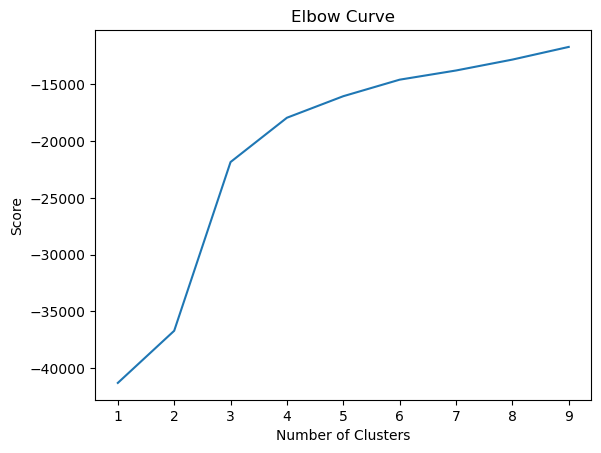

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.savefig("C:/Users/User/250104_Global Internet Access Analysis/04 Analysis/elbow_curve.png", dpi=300, bbox_inches='tight')
pl.show()

### The elbow curve flattens at four so I choose four clusters.

## 3. k-means clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [22]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [23]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [24]:
df_scaled.tail(20)

,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,Electricity_Access_Urban,Broadband_Subscriptions,Life_Expectancy,Sec_Edu_Duration,Literacy_Female,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban,clusters
2155,-1.617754,-0.778011,-2.203456,-2.294168,-2.228286,-0.969414,-1.426769,-1.612406,0.000000,0.000000,-1.398015e-15,1.711058,-1.697168,-1.125758,0.245063,-0.245063,-0.319506,0.716838,-0.716838,2
2156,-1.536919,-0.782750,-2.077275,-2.278596,-1.786007,-0.968390,-1.359531,-1.612406,0.000000,0.000000,-1.398015e-15,1.682979,-1.650846,-1.126519,0.236854,-0.236854,-0.319040,0.692792,-0.692792,2
2157,-1.484200,-0.783851,-1.907719,-2.116651,-1.629069,-0.964965,-1.282123,-1.612406,0.000000,0.000000,-1.398015e-15,1.651812,-1.601138,-1.125585,0.228377,-0.228377,-0.318564,0.668472,-0.668472,2
2158,-1.417423,-0.780279,-1.714505,-1.988964,-1.250992,-0.963604,-1.239059,-1.612406,0.000000,0.000000,-1.398015e-15,1.617799,-1.547403,-1.124034,0.219642,-0.219642,-0.318077,0.643831,-0.643831,2
2159,-1.343617,-0.777968,-1.718448,-2.038793,-1.172523,-0.948781,-1.209733,-1.612406,-1.226264,-0.460030,-1.007770e+00,1.582351,-1.492122,-1.121666,0.213390,-0.213390,-0.317584,0.618869,-0.618869,2
2160,-1.188975,-0.781658,-1.608040,-1.982735,-0.944250,-0.942859,-1.150158,-1.612406,0.000000,0.000000,-1.398015e-15,1.544549,-1.433868,-1.118413,0.209214,-0.209214,-0.317085,0.593633,-0.593633,2
2161,-0.985157,-0.790972,-1.544949,-1.988964,-0.723110,-0.946508,-1.204714,-1.612406,0.560947,0.675943,6.024280e-01,1.503429,-1.370465,-1.114912,0.207046,-0.207046,-0.316580,0.568122,-0.568122,2
2162,-0.899004,-0.775195,-1.462143,-1.973392,-0.501971,-0.948081,-1.357550,-1.612406,0.000000,0.000000,-1.398015e-15,1.460475,-1.303677,-1.111836,0.206620,-0.206620,-0.316077,0.542336,-0.542336,2
2163,-0.748449,-0.759785,-1.418768,-1.973392,-0.409235,-0.946731,-1.280934,-1.612406,0.000000,0.000000,-1.398015e-15,1.416226,-1.236435,-1.107041,0.208056,-0.208056,-0.315569,0.516275,-0.516275,2
2164,-1.424452,-0.831390,-1.568608,-1.683759,-0.523371,-0.939815,-2.096896,-0.457994,0.000000,0.000000,-1.398015e-15,1.537047,-1.627504,-0.904075,0.940465,-0.940465,-0.321427,1.108346,-1.108346,2


In [25]:
df_scaled['clusters'].value_counts()

clusters
3    941
0    674
2    345
1    215
Name: count, dtype: int64

In [26]:
# export clustered dataset
df_scaled.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cluster_dataset.csv'))

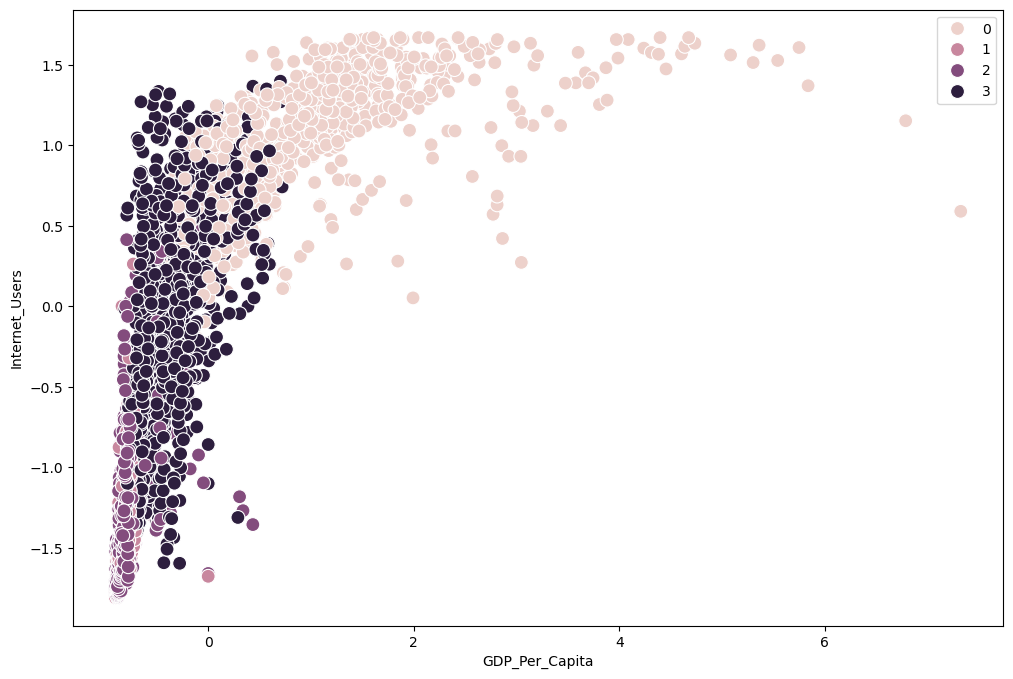

In [27]:
# Plot the clusters for the "Internet_Users" and "GDP_Per_Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['GDP_Per_Capita'], y=df_scaled['Internet_Users'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP_Per_Capita') # Label x-axis.
plt.ylabel('Internet_Users') # Label y-axis.
plt.savefig("C:/Users/User/250104_Global Internet Access Analysis/04 Analysis/GDP_cluster_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

## Discuss how and why the clusters make sense
The clusters seem intertwined, indicating that there is no clear separation between the data points.  
This could be due to overlapping features, a lack of strong clustering structure, or the limitations of the clustering algorithm used.
The relationship between these variables appears more gradual, making clear separation difficult.

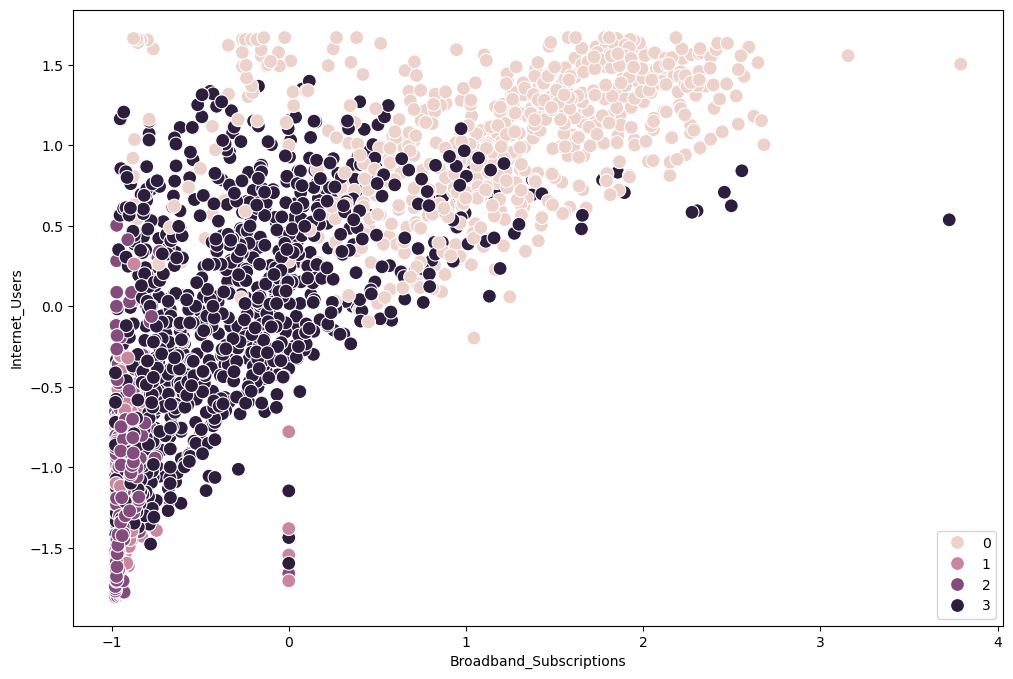

In [29]:
# Plot the clusters for the "Internet_Users" and "Broadband_Subscriptions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Broadband_Subscriptions'], y=df_scaled['Internet_Users'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Broadband_Subscriptions') # Label x-axis.
plt.ylabel('Internet_Users') # Label y-axis.
plt.savefig("C:/Users/User/250104_Global Internet Access Analysis/04 Analysis/broadband_cluster_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

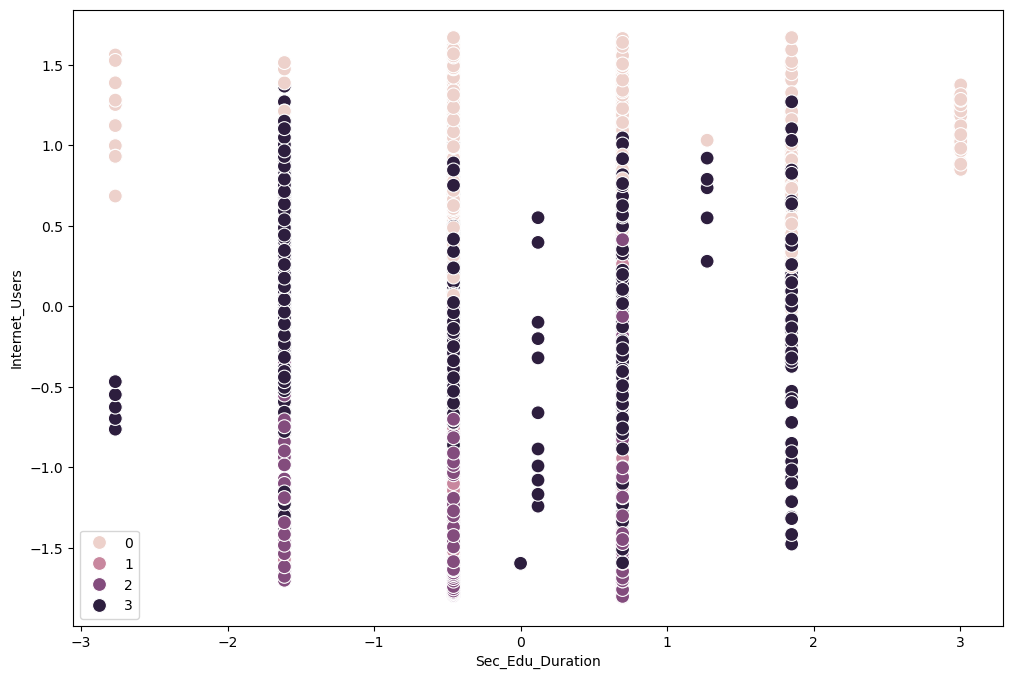

In [30]:
# Plot the clusters for the "Internet_Users" and "Sec_Edu_Duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Sec_Edu_Duration'], y=df_scaled['Internet_Users'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sec_Edu_Duration') # Label x-axis.
plt.ylabel('Internet_Users') # Label y-axis.
plt.savefig("C:/Users/User/250104_Global Internet Access Analysis/04 Analysis/Sec_Edu_cluster_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

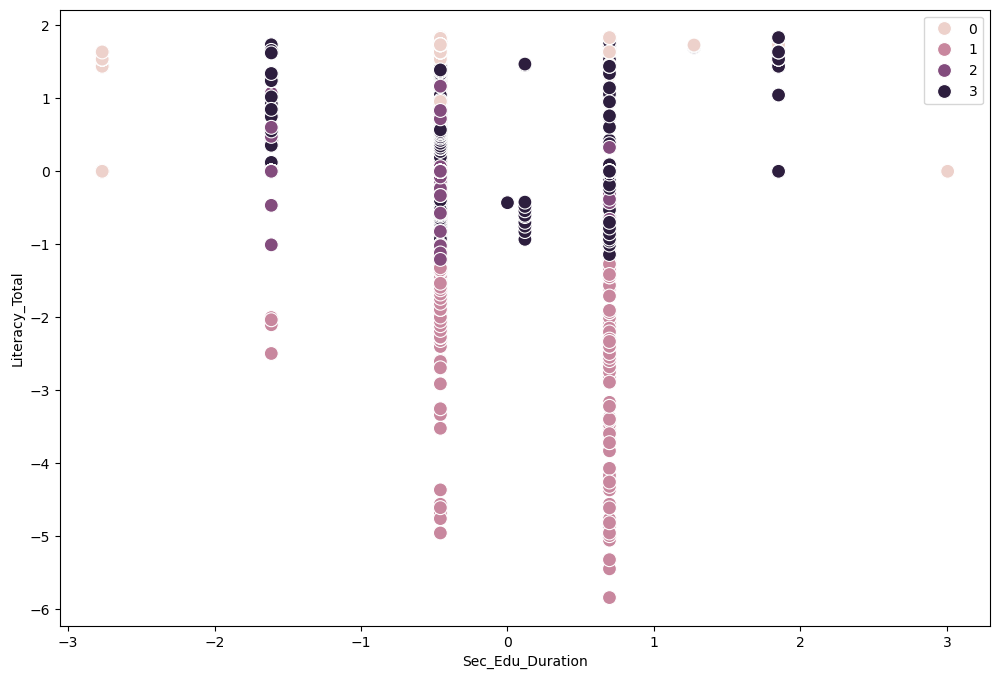

In [31]:
# Plot the clusters for the "Literacy_Total" and "Sec_Edu_Duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Sec_Edu_Duration'], y=df_scaled['Literacy_Total'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sec_Edu_Duration') # Label x-axis.
plt.ylabel('Literacy_Total') # Label y-axis.
plt.savefig("C:/Users/User/250104_Global Internet Access Analysis/04 Analysis/SecEdu_Lit_cluster_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
df_scaled.loc[df_scaled['clusters'] == 3, 'cluster'] = 'dark purple'
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'purple'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'pink'
df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'rose'

In [33]:
df_scaled.groupby('cluster').agg({'Internet_Users':['mean', 'median'], 
                         'GDP_Per_Capita':['mean', 'median'], 
                         'Sec_Edu_Duration':['mean', 'median'],
                          'Literacy_Total':['mean', 'median']})

Internet_Users           GDP_Per_Capita            \
                      mean    median           mean    median   
cluster                                                         
dark purple      -0.041407 -0.007866      -0.341317 -0.383208   
pink             -1.186990 -1.234664      -0.774625 -0.773635   
purple           -1.196280 -1.290209      -0.760157 -0.808907   
rose              1.048788  1.094637       1.112726  0.931942   

            Sec_Edu_Duration           Literacy_Total                
                        mean    median           mean        median  
cluster                                                              
dark purple        -0.169212 -0.457994       0.331078 -1.398015e-15  
pink               -0.082140 -0.457994      -2.232399 -1.891811e+00  
purple             -0.267266 -0.457994      -0.063894 -1.398015e-15  
rose                0.399250  0.696417       0.282588 -1.398015e-15

## Discuss your findings of the descriptive analysis
Dark purple represents the wealthiest regions with the highest Internet usage and GDP per capita, but average education duration.
Pink includes the least developed areas with the lowest Internet access, GDP, and literacy.
Purple falls in the mid-range, suggesting developing regions with moderate Internet use and GDP.
Rose has high Internet usage and GDP, second to dark purple, but the longest education duration.
Since literacy rates show little variation, the clustering is primarily driven by economic and internet usage factors.

## Propose what these results could be useful for in future steps of an analytics pipeline
The insights from clustering help uncover hidden patterns in GDP, internet usage, and education, guiding further data exploration.
The clusters can be used to build machine learning models for forecasting trends in digital adoption, economic growth, or education access.
Organizations can use these results to develop targeted policies or resource allocation strategies based on cluster characteristics.
Future data updates can be analyzed within the same clustering framework to detect shifts in trends and validate previous insights.